# 代码实现

In [1]:
from utils import *


# 计算角点响应函数
def responseFunc(M):
    # 设置超参数
    k = 0.04
    
    # 计算M的行列式
    det = np.linalg.det(M)
    # 计算M的迹
    trace = np.trace(M)
    
    # 计算角点响应函数
    R = det - k * trace ** 2
    
    return R


# Harris角点检测算法
def harris_corners(src, NMS=False):
    
    # 获得输入图像的长宽
    h, w = src.shape[:2]
    
    # 将图像转为灰度图像
    gray_image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    
    # 初始化角点矩阵
    cornerPoint = np.zeros_like(gray_image,dtype=np.float32)
    
    # 计算图像沿横轴和纵轴的梯度
    grad = np.zeros((h, w, 2), dtype=np.float32)
    # x轴梯度
    grad[:,:,0] = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)
    # y轴梯度
    grad[:,:,1] = cv2.Sobel(gray_image, cv2.CV_16S, 0, 1)
    
    # 计算黑塞矩阵内元素的值，此时的值是求和的结果，即M矩阵的元素
    Ixx = grad[:,:,0] ** 2
    Iyy = grad[:,:,1] ** 2
    Ixy = grad[:,:,0] * grad[:,:,1]
     
    # 计算窗口内黑塞矩阵元素的值，窗函数使用高斯函数
    Ixx = cv2.GaussianBlur(Ixx, (3, 3), sigmaX=2)
    Iyy = cv2.GaussianBlur(Iyy, (3, 3), sigmaX=2)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=2)
    
    for i in range(gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            
            # 构建M矩阵
            struture_matrix = [[Ixx[i][j], Ixy[i][j]], 
                               [Ixy[i][j], Iyy[i][j]]]

            # 计算角点响应函数
            R = responseFunc(struture_matrix)
            cornerPoint[i][j] = R

    # 非最大抑制
    corners = np.zeros_like(gray_image, dtype=np.float32)
    threshold = 0.01
    
    # 返回所有角点响应的最大值
    maxValue = np.max(cornerPoint)
    
    # 我们将角点响应函数的阈值设定为 threshold * maxValue
    
    for i in range(cornerPoint.shape[0]):
        for j in range(cornerPoint.shape[1]):
            
            # 如果进行NMS操作
            if NMS:
                # 当前角点响应值大于阈值，同时也是邻居周围的最大值
                if cornerPoint[i][j] > threshold * maxValue and \
                    cornerPoint[i][j] == np.max(
                    cornerPoint[max(0, i - 1):min(i + 1, h - 1), 
                    max(0, j - 1):min(j + 1, w - 1)]):
                    
                    corners[i][j] = 255
            else:
                # 当前角点响应值大于阈值
                if cornerPoint[i][j] > threshold * maxValue:
                    corners[i][j] = 255
                    
    # 返回检测到的角点
    return corners



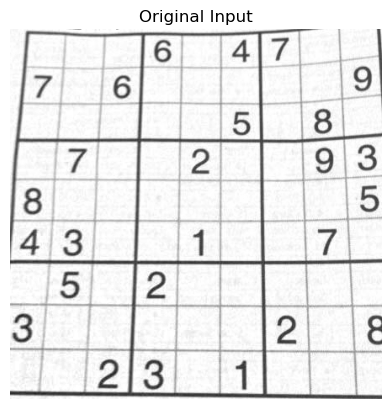

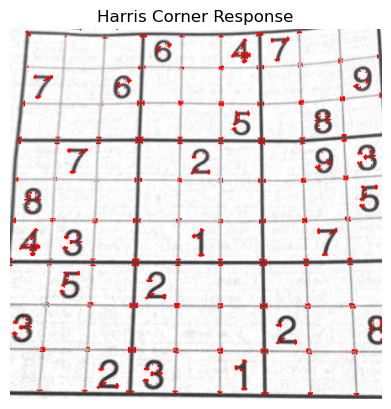

In [2]:
# 图像素材来自opencvpython网站
img = cv2.imread('sudoku.png')

plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.title('Original Input')
plt.show()

response = harris_corners(img)
img[response == 255] = [0, 0, 255]
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.title('Harris Corner Response')
plt.show()